# Plot creation

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np

%matplotlib inline

In [22]:
def plot_scatter_and_regression(x, y, label, color):
    plt.scatter(x, y, label=label, color=color)
    regr = linear_model.LinearRegression()
    regr.fit(np.expand_dims(x, axis=1),  np.log(y))
    x = [np.min(x), 2030]
    y = np.exp(regr.predict(np.expand_dims(x, axis=1)))
    plt.plot(x, y, color=color)

In [32]:
def plot_top500():
    df = pd.read_csv('top500.csv')

    x = df.date
    y = df.top1
    plot_scatter_and_regression(x, y, label='top1 supercomputer', color='C0')

    x = df.date
    y = df.top500_sum
    plot_scatter_and_regression(x, y, label='top500 supercomputer sum', color='C1')

In [24]:
def plot_nvidia(use_seaborn=True):
    df = pd.read_csv('nvidia.csv')

    x = df.date.values
    y = df.flops.values
    plot_scatter_and_regression(x, y, label='nvidia gpu', color='C2')

In [25]:
def plot_moravec():
    df = pd.read_csv('moravec.tsv', sep='\t')
    df = df.loc[35:]
    
    x = df[df['1997k$'] < 20].Year
    y = df[df['1997k$'] < 20].MIPS*1e6
    plot_scatter_and_regression(x, y, label='moravec', color='C3')
    
    x = df[df['1997k$'] > 1000].Year
    y = df[df['1997k$'] > 1000].MIPS*1e6
    plot_scatter_and_regression(x, y, label='moravec_supercomputers', color='C4')

In [26]:
def add_scales_text():
    x = 2031
    y = np.logspace(3, 21, 7)
    labels = ['kilo', 'mega', 'giga', 'tera', 'peta', 'hexa', 'zetta']
    for label, y_value in zip(labels, y):
        plt.text(x, y_value*0.7, label.title(), fontsize=16)

In [27]:
def prepare_image_for_log_imshow(img):
    new_col_index = (np.logspace(1, np.log10(len(img)-1), len(img))).astype(np.int)
    img = img[new_col_index]
    return img

In [28]:
def add_brain_estimations():
    #img = plt.imread('media/human.jpg')
    #img = prepare_image_for_log_imshow(img)
    #plt.imshow(img, extent=(1970, 1975,  1e12, 1e16), resample=True)
    label='brain'
    plt.text(1985, 1e18, label.title(), fontsize=16)

In [29]:
def create_plot():
    plt.figure(figsize=(16.6667, 10))
    plt.title('Evolution of computer power over time', fontsize=20)
    plot_top500()
    plot_nvidia()
    plot_moravec()
    plt.yscale('log', subsy=range(2, 10))
    plt.legend(loc=0, fontsize=14)
    plt.grid()
    plt.ylim(1e4, 1e21)
    plt.xlim(1960, 2030)
    plt.xlabel('year', fontsize=16)
    plt.ylabel('flops', fontsize=16)
    plt.xticks(np.arange(1960, 2031, 5), fontsize=16)
    plt.yticks(np.logspace(3, 21, 7), fontsize=16)
    add_scales_text()
    #add_brain_estimations()
    plt.savefig('figure.png', dpi=300)

/home/gbarbadillo/miniconda3/envs/tino_tf24/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: The 'subsy' parameter of __init__() has been renamed 'subs' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  import sys


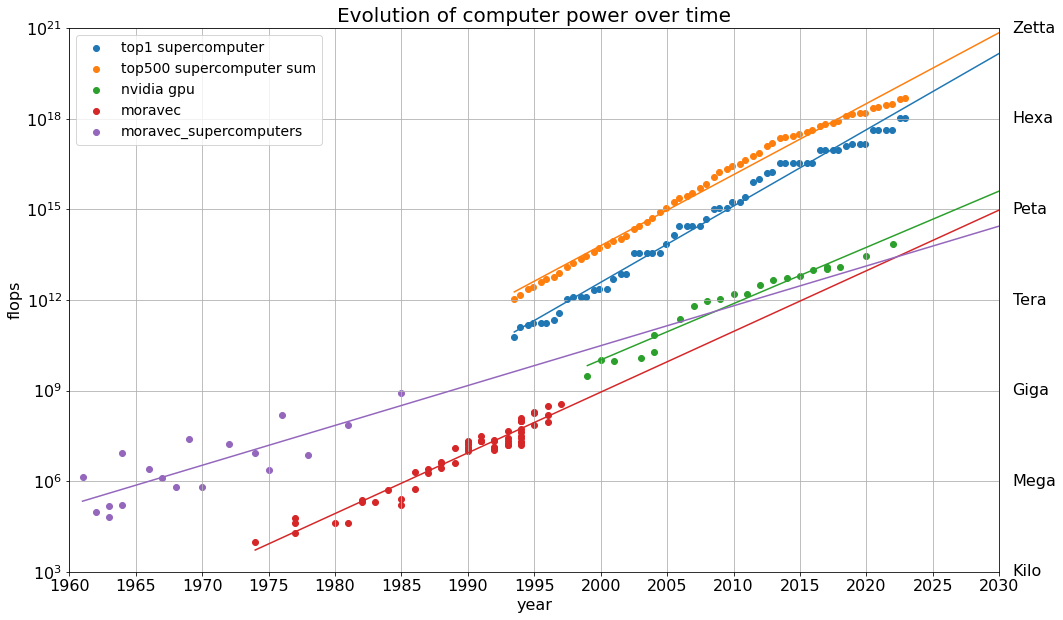

In [33]:
create_plot()